# Problem Statement

## Context

AllLife Bank wants to focus on its credit card customer base in the next financial year. They have been advised by their marketing research team, that the penetration in the market can be improved. Based on this input, the Marketing team proposes to run personalized campaigns to target new customers as well as upsell to existing customers. Another insight from the market research was that the customers perceive the support services of the back poorly. Based on this, the Operations team wants to upgrade the service delivery model, to ensure that customer queries are resolved faster. The Head of Marketing and Head of Delivery both decide to reach out to the Data Science team for help

## Objective
To identify different segments in the existing customers, based on their spending patterns as well as past interaction with the bank, using clustering algorithms, and provide recommendations to the bank on how to better market to and service these customers.

## Data Description
The data provided is of various customers of a bank and their financial attributes like credit limit, the total number of credit cards the customer has, and different channels through which customers have contacted the bank for any queries (including visiting the bank, online, and through a call center).

### Data Dictionary
- **Sl_No:** Primary key of the records
- **Customer Key:** Customer identification number
- **Average Credit Limit:** Average credit limit of each customer for all credit cards
- **Total credit cards:** Total number of credit cards possessed by the customer
- **Total visits bank:** Total number of visits that the customer made (yearly) personally to the bank
- **Total visits online:** Total number of visits or online logins made by the customer (yearly)
- **Total calls made:** Total number of calls made by the customer to the bank or its customer service department (yearly)

# Importing Libraries

In [1]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# to scale the data using z-score
from sklearn.preprocessing import StandardScaler

# to compute distances
from scipy.spatial.distance import cdist, pdist

# to perform k-means clustering and compute silhouette scores
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# to visualize the elbow curve and silhouette scores
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

# to perform hierarchical clustering, compute cophenetic correlation, and create dendrograms
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet

# to perform PCA
from sklearn.decomposition import PCA

# to suppress warnings
import warnings

warnings.filterwarnings("ignore")

# Loading Dataset

In [2]:
data = pd.read_excel("/content/Credit Card Customer Data.xlsx")

In [ ]:
data.head()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3


## Shape of the dataset

In [ ]:
data.shape

(660, 7)

## Datatype if each column

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Sl_No                660 non-null    int64
 1   Customer Key         660 non-null    int64
 2   Avg_Credit_Limit     660 non-null    int64
 3   Total_Credit_Cards   660 non-null    int64
 4   Total_visits_bank    660 non-null    int64
 5   Total_visits_online  660 non-null    int64
 6   Total_calls_made     660 non-null    int64
dtypes: int64(7)
memory usage: 36.2 KB


## Describe function for the dataset

In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Sl_No,660.0,330.500000,190.669872,1.0,165.75,330.5,495.25,660.0
Customer Key,660.0,55141.443939,25627.772200,11265.0,33825.25,53874.5,77202.50,99843.0
Avg_Credit_Limit,660.0,34574.242424,37625.487804,3000.0,10000.00,18000.0,48000.00,200000.0
Total_Credit_Cards,660.0,4.706061,2.167835,1.0,3.00,5.0,6.00,10.0
Total_visits_bank,660.0,2.403030,1.631813,0.0,1.00,2.0,4.00,5.0
Total_visits_online,660.0,2.606061,2.935724,0.0,1.00,2.0,4.00,15.0
Total_calls_made,660.0,3.583333,2.865317,0.0,1.00,3.0,5.00,10.0


## Checking for null and duplicated values

In [ ]:
data.isnull().sum()

,0
Sl_No,0
Customer Key,0
Avg_Credit_Limit,0
Total_Credit_Cards,0
Total_visits_bank,0
Total_visits_online,0
Total_calls_made,0


In [ ]:
data.isna().sum()

,0
Sl_No,0
Customer Key,0
Avg_Credit_Limit,0
Total_Credit_Cards,0
Total_visits_bank,0
Total_visits_online,0
Total_calls_made,0


In [ ]:
data.duplicated().sum()

0

## Understanding the dataset

In [ ]:
len(data['Sl_No'].unique())

660

In [ ]:
len(data['Customer Key'].unique())

655

In [ ]:
data['Customer Key'].value_counts()

,count
Customer Key,
97935,2
50706,2
47437,2
37252,2
96929,2
...,...
73811,1
72892,1
51773,1


In [ ]:
repeated_values = data[data.duplicated('Customer Key', keep=False)]

print("The shape is :", repeated_values.shape)
repeated_values

The shape is : (10, 7)


,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
4,5,47437,100000,6,0,12,3
48,49,37252,6000,4,0,2,8
104,105,97935,17000,2,1,2,10
332,333,47437,17000,7,3,1,0
391,392,96929,13000,4,5,0,0
398,399,96929,67000,6,2,2,2
411,412,50706,44000,4,5,0,2
432,433,37252,59000,6,2,1,2
541,542,50706,60000,7,5,2,2
632,633,97935,187000,7,1,7,0


In [ ]:
data = data[~data.duplicated("Customer Key", keep=False)]

In [ ]:
len(data['Customer Key'].unique())

650

In [ ]:
len(data['Avg_Credit_Limit'].unique())

109

In [ ]:
data['Avg_Credit_Limit'].value_counts()

,count
Avg_Credit_Limit,
8000,35
6000,30
9000,28
13000,27
10000,26
19000,26
11000,24
7000,24
14000,23


In [ ]:
data['Avg_Credit_Limit'].value_counts(1)

,proportion
Avg_Credit_Limit,
8000,0.053846
6000,0.046154
9000,0.043077
13000,0.041538
10000,0.040000
19000,0.040000
11000,0.036923
7000,0.036923
14000,0.035385


In [ ]:
len(data['Total_Credit_Cards'].unique())

10

In [ ]:
data['Total_Credit_Cards'].value_counts(1)

,proportion
Total_Credit_Cards,
4,0.227692
6,0.175385
7,0.150769
5,0.113846
2,0.096923
1,0.090769
3,0.081538
10,0.029231
9,0.016923


In [ ]:
len(data['Total_visits_bank'].unique())

6

In [ ]:
data['Total_visits_bank'].value_counts(1)

,proportion
Total_visits_bank,
2,0.240000
1,0.169231
3,0.152308
0,0.150769
5,0.146154
4,0.141538


In [ ]:
len(data['Total_visits_online'].unique())

16

In [ ]:
data['Total_visits_online'].value_counts(1)

,proportion
Total_visits_online,
2,0.284615
0,0.218462
1,0.164615
4,0.106154
5,0.083077
3,0.067692
15,0.015385
10,0.009231
7,0.009231


In [ ]:
len(data['Total_calls_made'].unique())

11

In [ ]:
data['Total_calls_made'].value_counts(1)

,proportion
Total_calls_made,
4,0.166154
0,0.144615
1,0.138462
2,0.133846
3,0.126154
6,0.060000
7,0.053846
9,0.049231
8,0.044615


## Droping Sl_No and duplicated customer key

In [3]:
data = data[~data.duplicated("Customer Key", keep=False)]

In [4]:
data = data.drop('Sl_No', axis = 1)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 650 entries, 0 to 659
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Customer Key         650 non-null    int64
 1   Avg_Credit_Limit     650 non-null    int64
 2   Total_Credit_Cards   650 non-null    int64
 3   Total_visits_bank    650 non-null    int64
 4   Total_visits_online  650 non-null    int64
 5   Total_calls_made     650 non-null    int64
dtypes: int64(6)
memory usage: 35.5 KB


## **Summary**

- The dataset consists of **660** Rows and **7** columns.
- All the columns in this given dataset are in Integer datatype.
- The dataset doesn't have any null values or duplicated values.
- We will drop the column `'Sl_No'` from the further processing of the data as it adds no signifact value to the clustering process.
- We found **655** unique values for `'Customer Key'` as there are 5 duplicates. The values of corresponding column for these duplicated values are unique which could create a confusion for these `'Customer Key'` values.
- The average credit limit of all the customers in the dataset is **34574.242424**.
  - The minimum value for the average credit limit of a customer **3000.0.**
  - 25% of the customers have the avergae credit limit of **10000.0**
  - 50% of the customers have the average credit limit of **18000.0**.
  - 75% of the customers have the average credit limit of **48000.0**.
  - The maximum avergae credit limit of the customer is **200000.0**.
- The minimum number of credit cards owned by a customer is 1 and the maximum being 10.
  - The 25% of customers have at most **3** credit cards.
  - The 50% of cutsomers have at most **5** credit cards.
  - The 75% of the customers have at most **6** credit cards.
  - The customers owning 4 credit cards constitute **22.08%** of the total dataset. Similarly, 6 credit card ownders are about **17%**, 7 credit card owners about 15% , 5 credit card owners about **11%** and rest of the total credit card number being **<10%**.
- The total number of bank visit at the lowest being **'0'**, highest at **'5'**. the 50% of customers have visited the bank at most **'2'** times in a year.
- The total number of online visit at the lowest being **'0'**, highest at **'15'**. the 50% of customers have visited online at most **'2'** times in a year.
- The total number of calls made to the bank is at the lowest being **'0'**, highest at **'10'**. the 50% of customers have called the bank at most **'3'** times in a year.

# EDA

## Functions for EDA

In [ ]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [43]:
def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = data[feature].value_counts().iloc[:n].sum() if n else len(data[feature])
    count = data[feature].nunique()

    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc:
            label = "{:.1f}%".format(100 * p.get_height() / total)
        else:
            label = str(p.get_height())

        x = p.get_x() + p.get_width() / 2
        y = p.get_height()

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )

    plt.show()

## Univariate Analysis

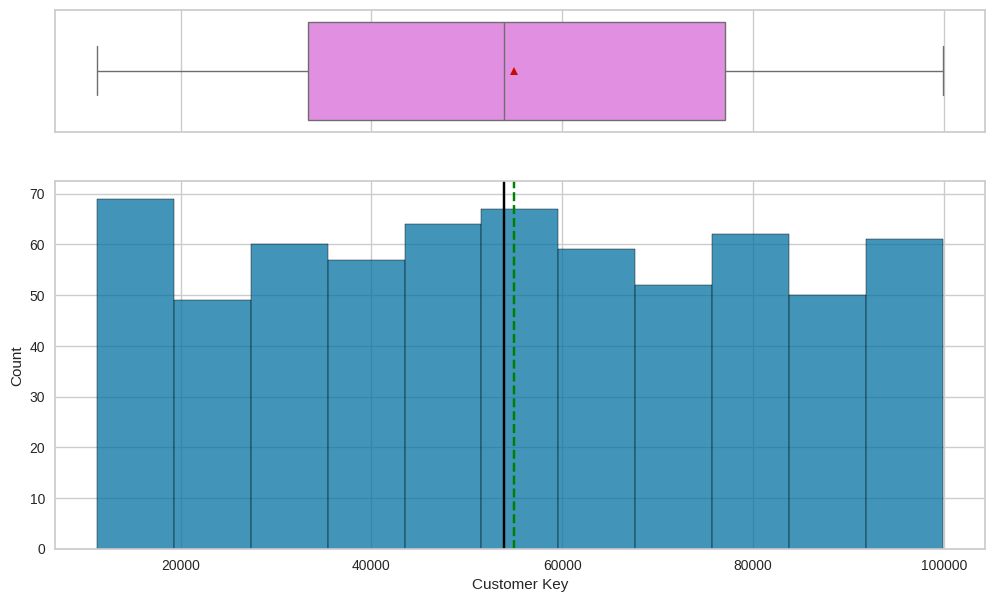

In [ ]:
histogram_boxplot(data, 'Customer Key')

<Axes: xlabel='Customer Key', ylabel='Count'>

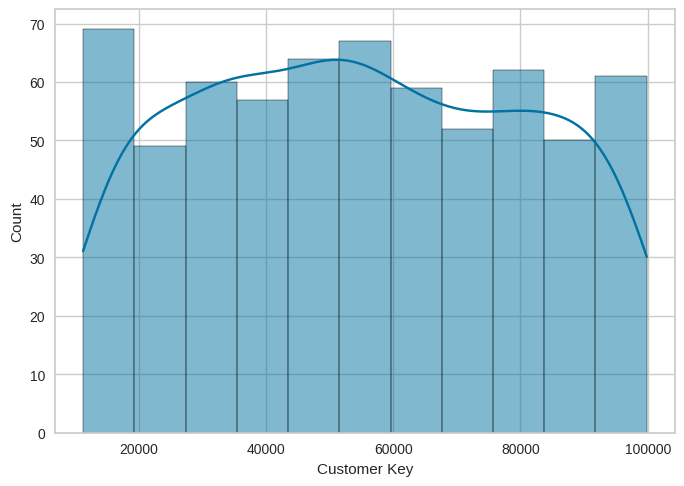

In [ ]:
sns.histplot(data=data, x = 'Customer Key', kde = True)

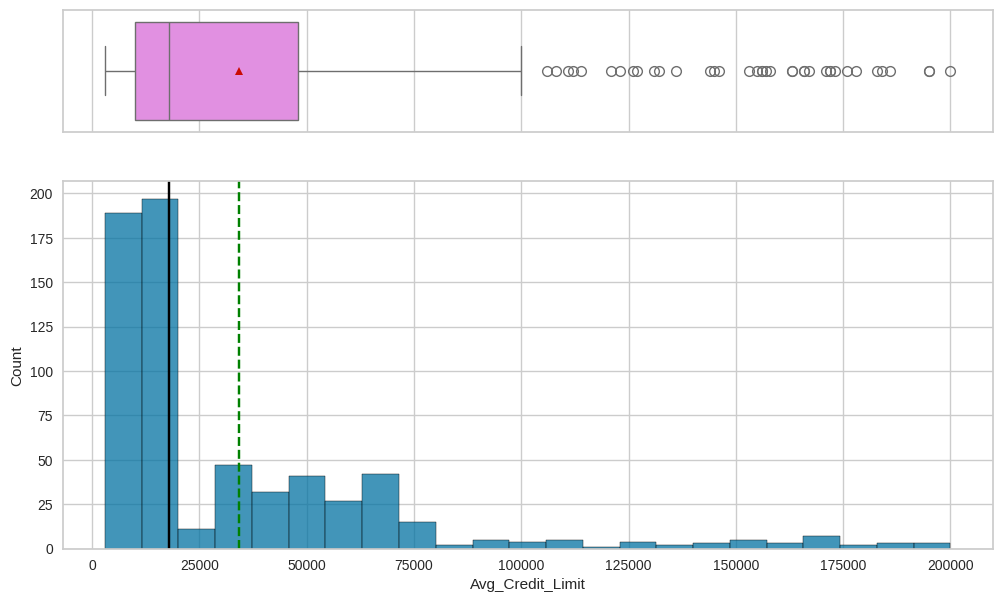

In [ ]:
histogram_boxplot(data, 'Avg_Credit_Limit')

In [ ]:
data[data['Avg_Credit_Limit']>100000]

,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
612,94391,157000,9,1,14,1
614,40019,163000,8,1,7,1
615,77910,131000,9,1,10,1
617,98216,136000,8,0,13,0
618,54495,121000,7,0,13,2
619,47650,158000,7,0,13,0
620,32107,108000,10,0,15,1
621,84192,166000,9,1,12,2
622,53916,176000,10,1,15,2
623,32584,166000,10,0,7,0


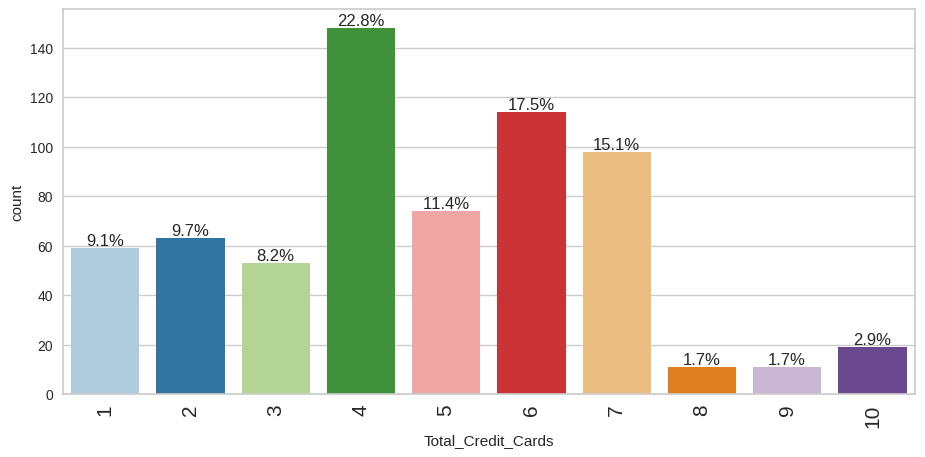

In [ ]:
labeled_barplot(data, 'Total_Credit_Cards', perc=True)

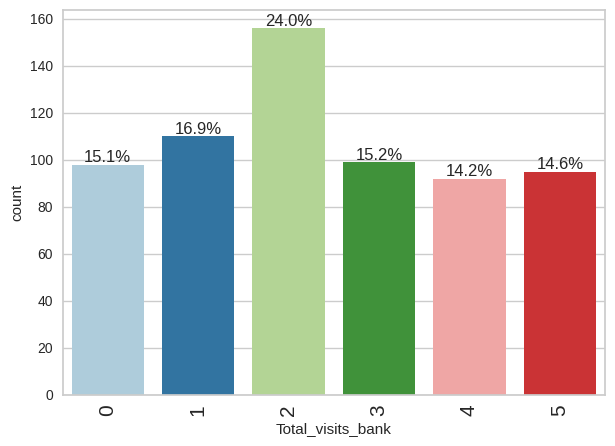

In [ ]:
labeled_barplot(data, 'Total_visits_bank', perc = True)

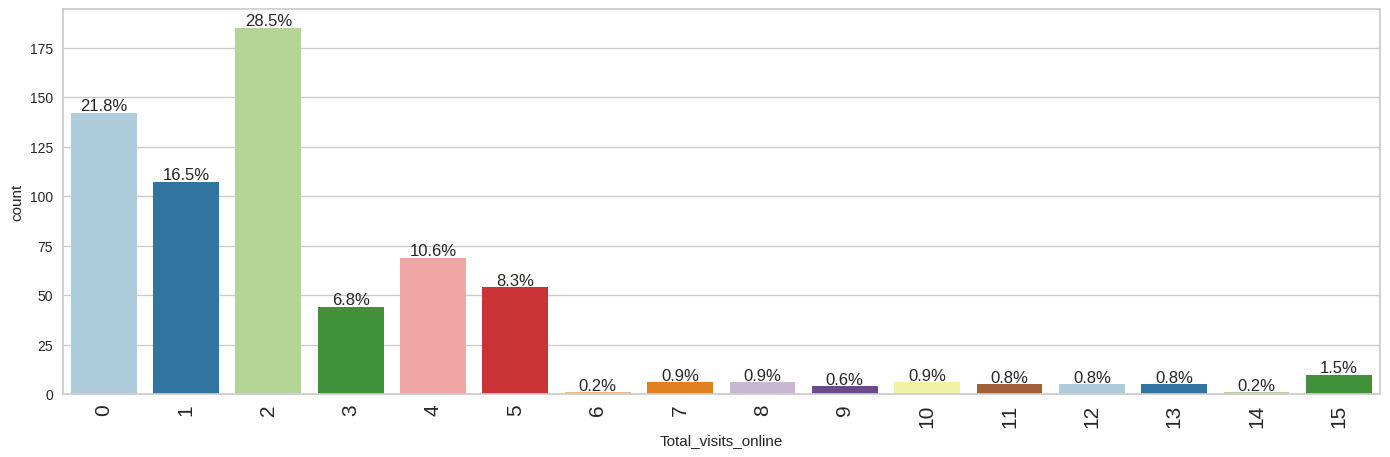

In [ ]:
labeled_barplot(data, 'Total_visits_online', perc = True)

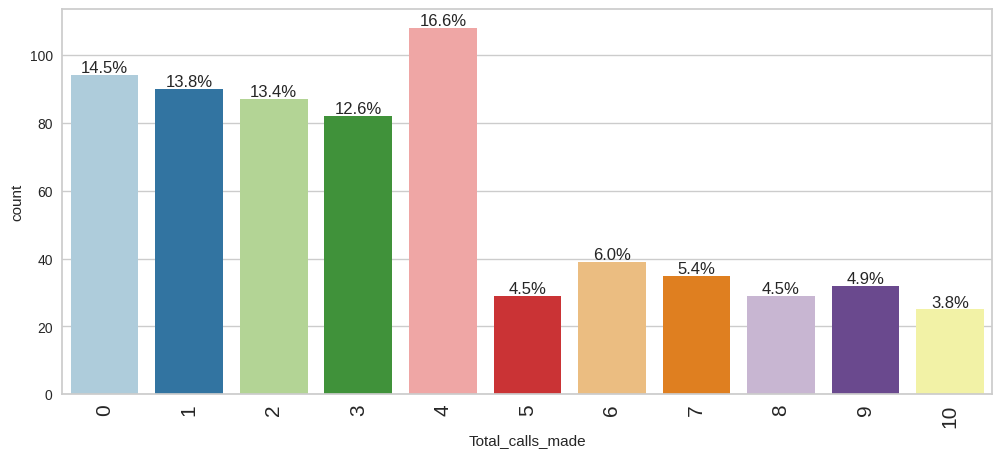

In [ ]:
labeled_barplot(data, 'Total_calls_made', perc = True)

#### Summary of Univariate Ananlysis

## Pair Plot and Heatmap

<Figure size 1000x1000 with 0 Axes>

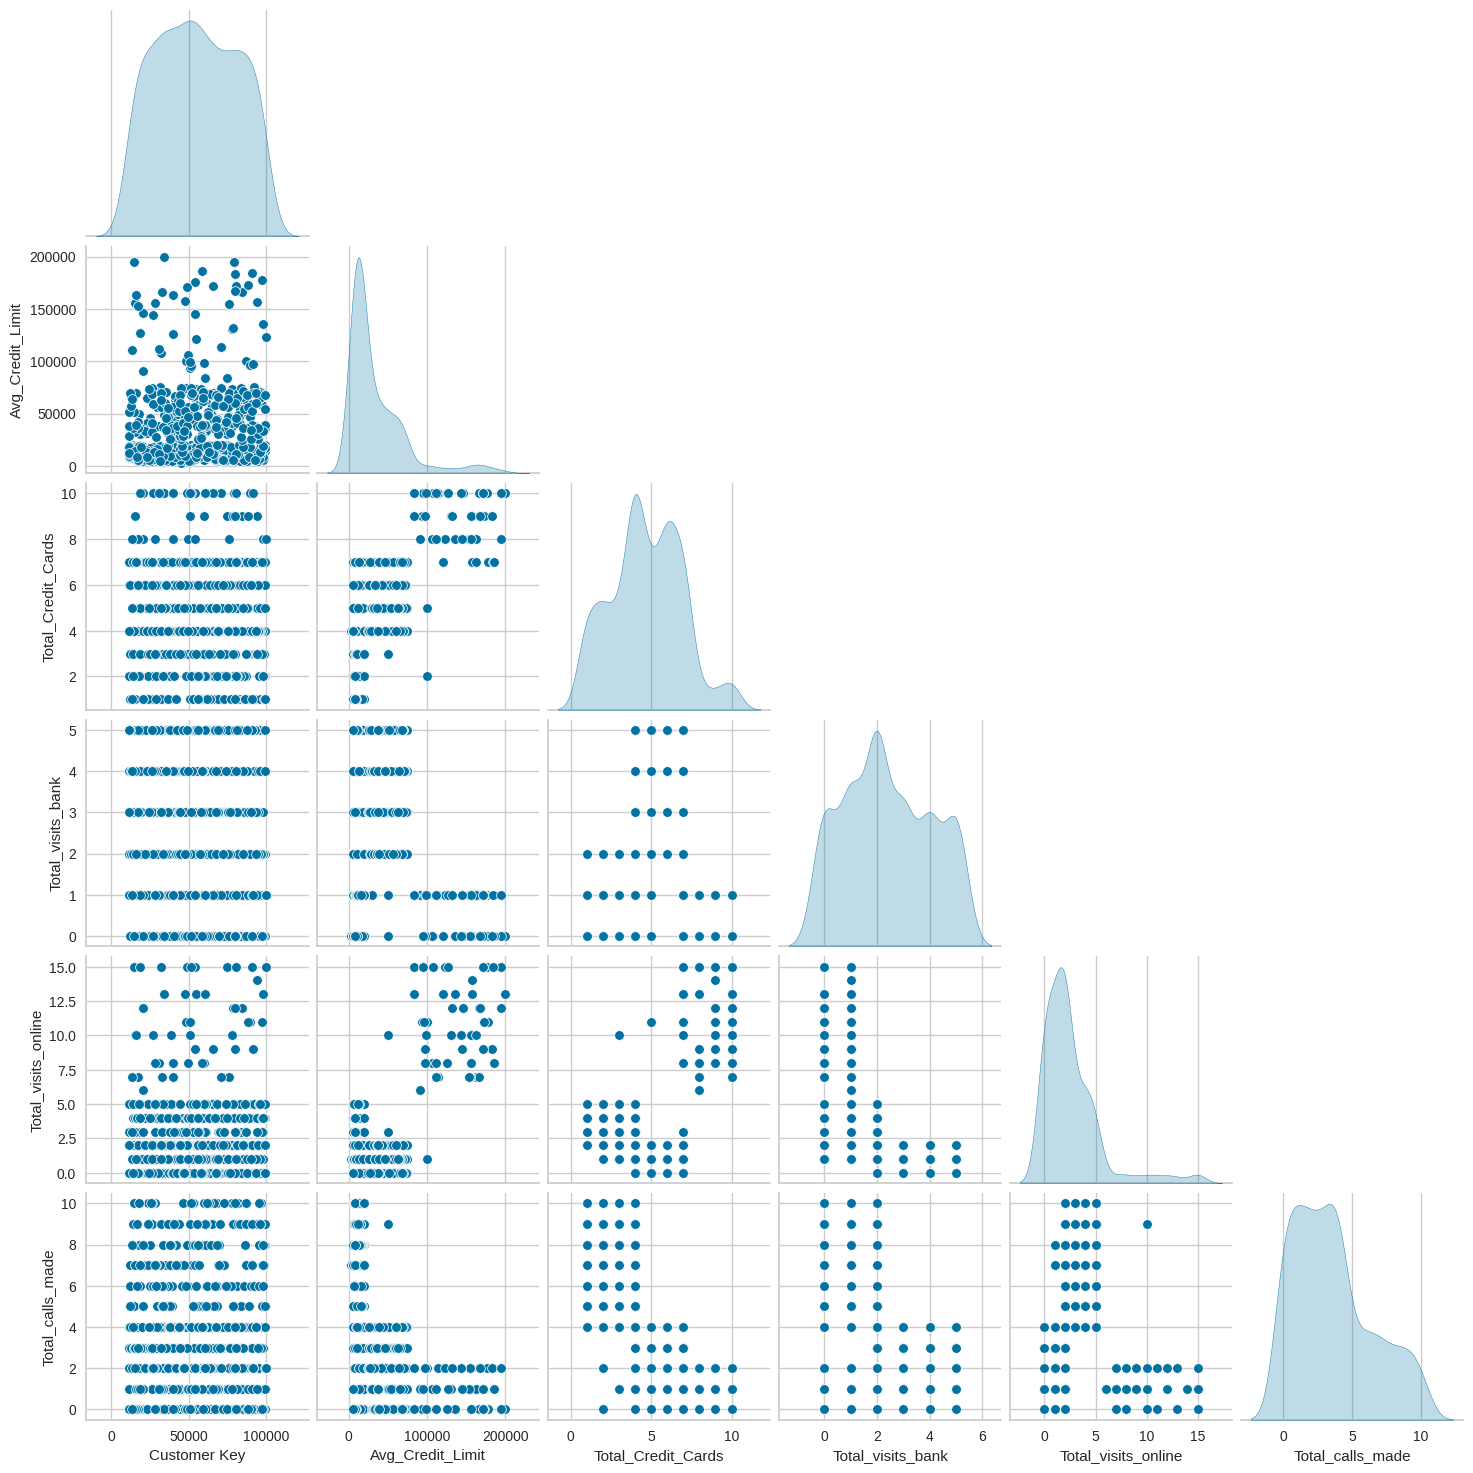

In [ ]:
plt.figure(figsize=(10,10))
sns.pairplot(data = data, diag_kind = 'kde', corner = True)
plt.show()

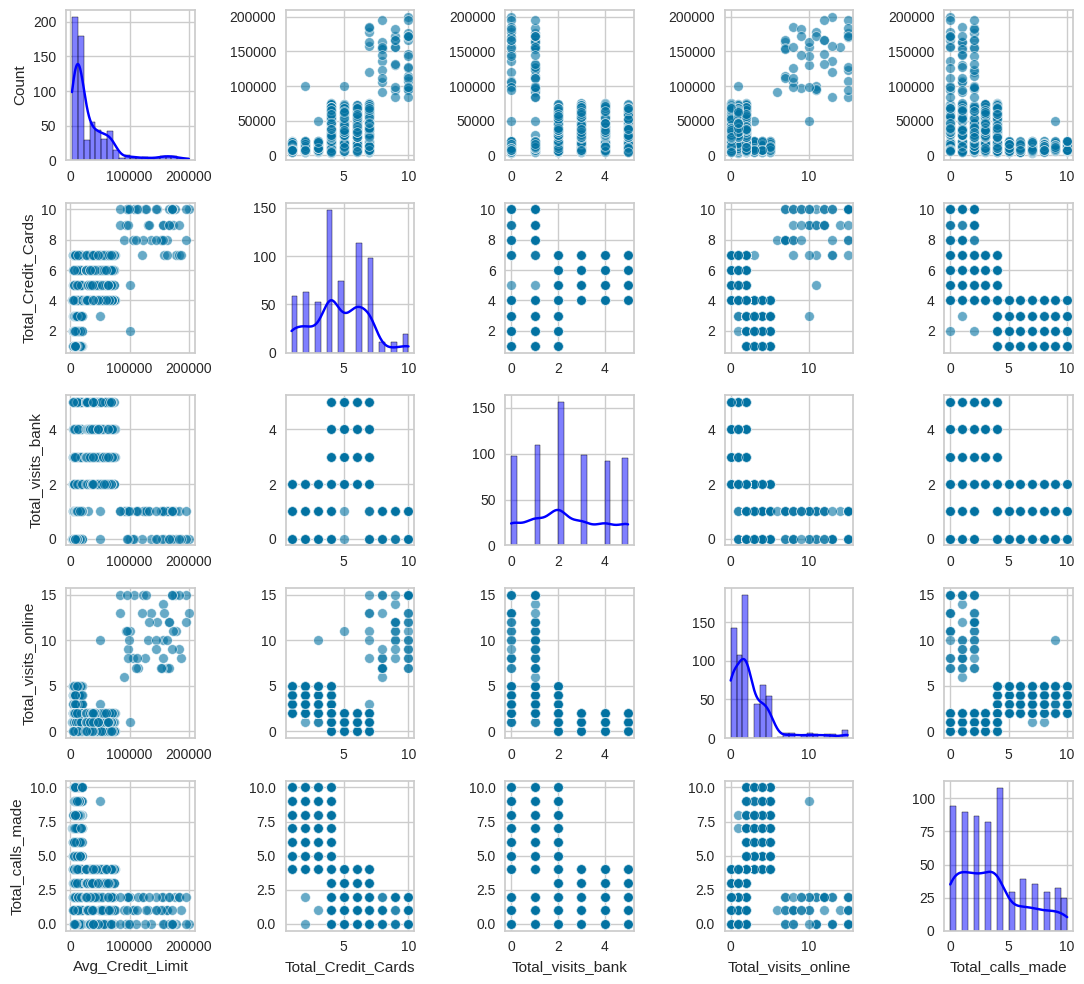

In [ ]:
# Assuming 'df' is your dataset
variables = data.columns[1:]  # Excluding 'Customer Key' if it's just an identifier
num_vars = len(variables)

# Create subplots (grid of scatterplots)
fig, axes = plt.subplots(nrows=num_vars, ncols=num_vars, figsize=(11, 10))  # Adjust size here

for i in range(num_vars):
    for j in range(num_vars):
        if i == j:
            # Diagonal: Distribution of each variable
            sns.histplot(data[variables[i]], bins=20, kde=True, ax=axes[i, j], color='blue')
        else:
            # Scatter plots for variable pairs
            sns.scatterplot(x=data[variables[j]], y=data[variables[i]], ax=axes[i, j], alpha=0.6)

        # Formatting: Remove redundant labels for clarity
        if j > 0:
            axes[i, j].set_ylabel("")
        if i < num_vars - 1:
            axes[i, j].set_xlabel("")

# Adjust layout
plt.tight_layout()
plt.show()

<Axes: >

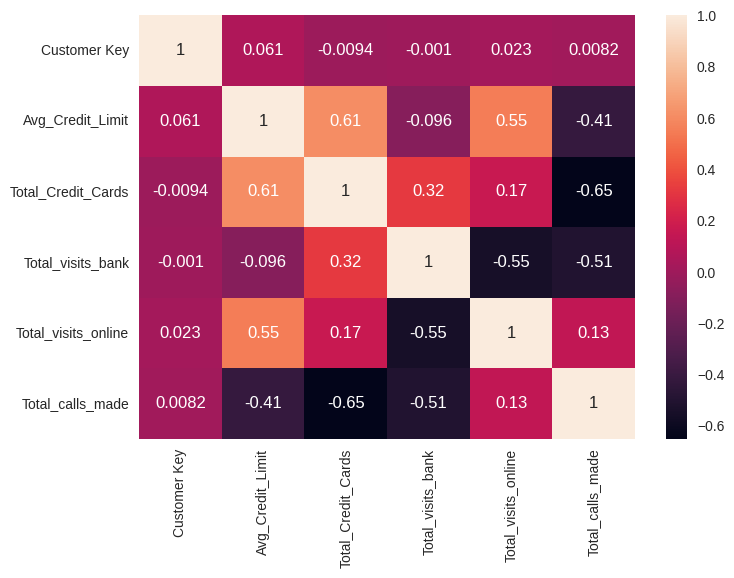

In [ ]:
sns.heatmap(data.corr(), annot = True)

#### Observations on Heatmap

## Bivariate Analysis

In [ ]:
data.head()

,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,87073,100000,2,1,1,0
1,38414,50000,3,0,10,9
2,17341,50000,7,1,3,4
3,40496,30000,5,1,1,4
5,58634,20000,3,0,1,8


### 'Avg_Credit_Limit' vs 'Total_Credit_Cards'

<Axes: ylabel='Avg_Credit_Limit'>

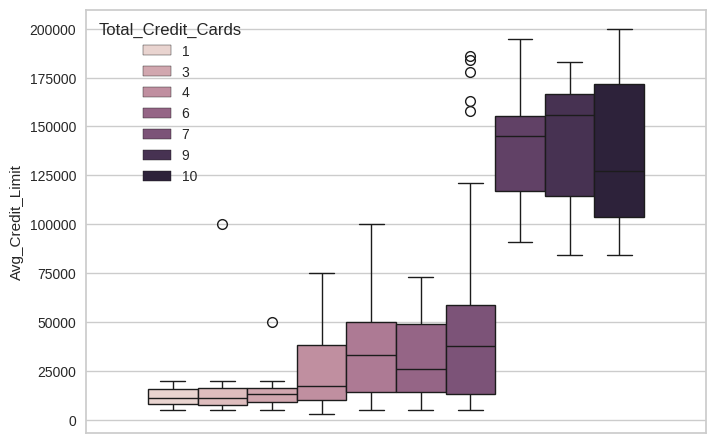

In [ ]:
sns.boxplot(data = data, y = "Avg_Credit_Limit", hue = "Total_Credit_Cards")

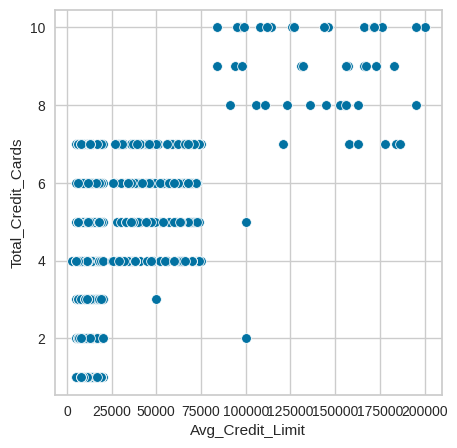

In [ ]:
sns.scatterplot(data = data, x = "Avg_Credit_Limit", y = "Total_Credit_Cards")
plt.show()

### 'Avg_Credit_Limit' vs 'Total_Online_Limit'

<Axes: ylabel='Avg_Credit_Limit'>

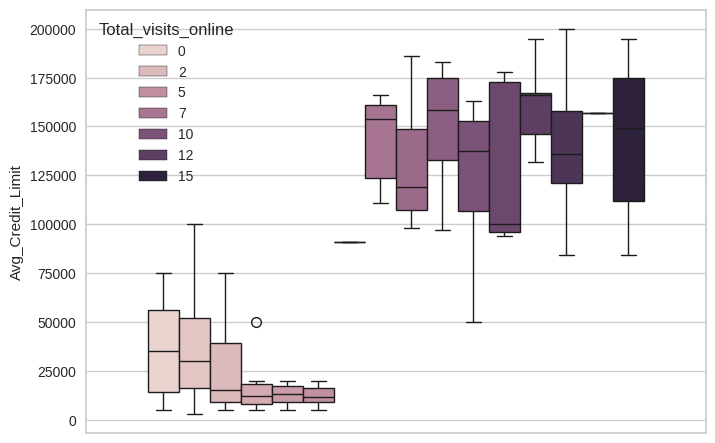

In [ ]:
sns.boxplot(data = data, y = "Avg_Credit_Limit", hue = "Total_visits_online")

<Axes: xlabel='Avg_Credit_Limit', ylabel='Total_visits_online'>

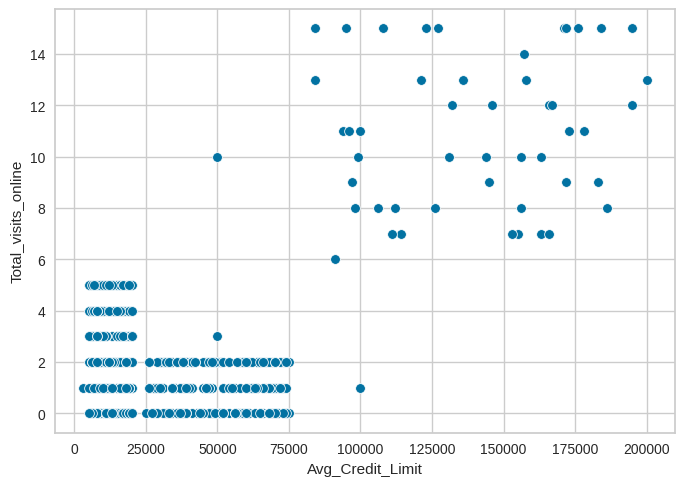

In [ ]:
sns.scatterplot(data = data, x = "Avg_Credit_Limit", y = "Total_visits_online")

### 'Avg_Credit_Limit' vs 'Total_calls_made'

<Axes: ylabel='Avg_Credit_Limit'>

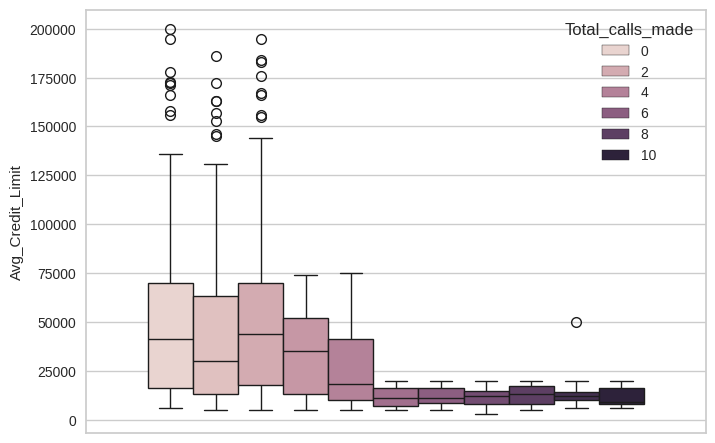

In [ ]:
sns.boxplot(data = data, y = "Avg_Credit_Limit", hue = "Total_calls_made")

<Axes: xlabel='Avg_Credit_Limit', ylabel='Total_calls_made'>

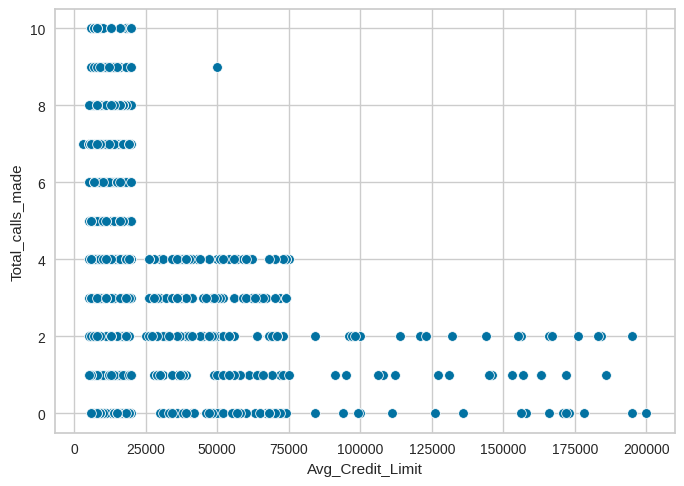

In [ ]:
sns.scatterplot(data = data, x = "Avg_Credit_Limit", y = "Total_calls_made")

### 'Avg_Credit_Limit' vs 'Total_visits_bank'

<Axes: ylabel='Avg_Credit_Limit'>

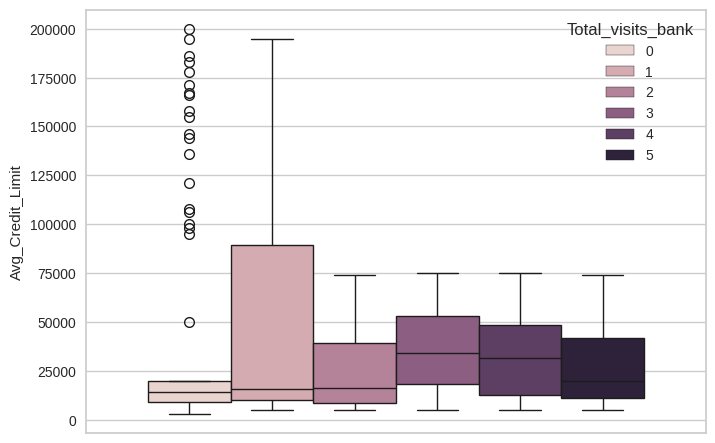

In [ ]:
sns.boxplot(data = data, y = "Avg_Credit_Limit", hue = "Total_visits_bank")

<Axes: xlabel='Avg_Credit_Limit', ylabel='Total_visits_bank'>

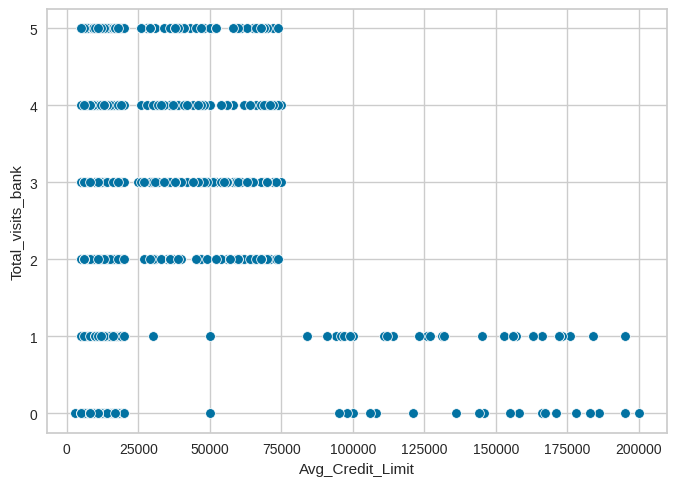

In [ ]:
sns.scatterplot(data = data, x = "Avg_Credit_Limit", y = "Total_visits_bank")

### 'Total_Credit_Cards'  vs 'Total_visits_bank'

<Axes: ylabel='Total_Credit_Cards'>

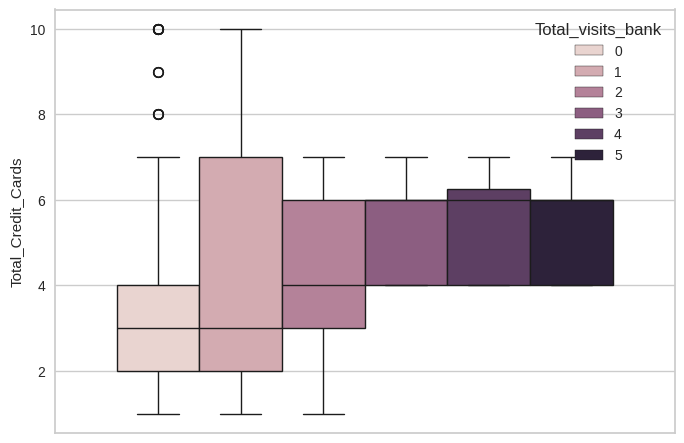

In [ ]:
sns.boxplot(data = data, y = "Total_Credit_Cards", hue = "Total_visits_bank")

<Axes: xlabel='Total_Credit_Cards', ylabel='count'>

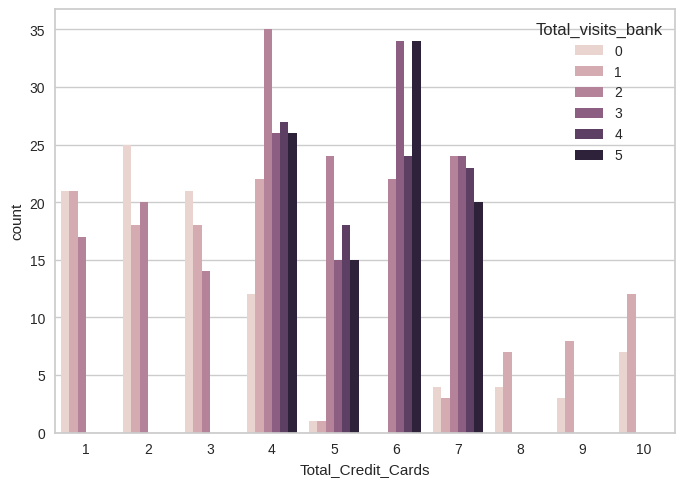

In [ ]:
sns.countplot(data = data, x = "Total_Credit_Cards", hue = "Total_visits_bank")

### 'Total_Credit_Cards'  vs 'Total_visits_online'

<Axes: ylabel='Total_Credit_Cards'>

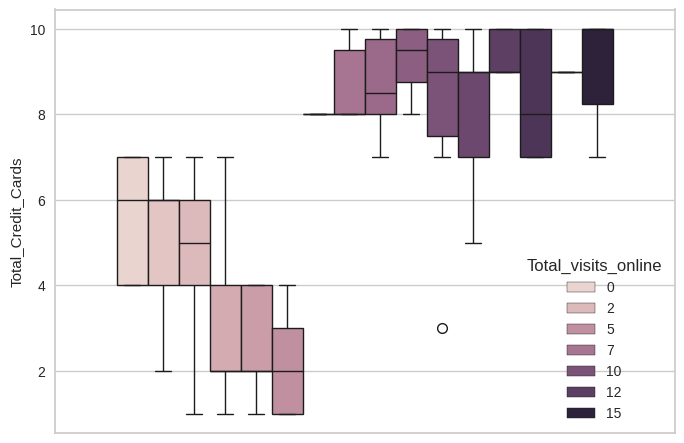

In [ ]:
sns.boxplot(data = data, y = "Total_Credit_Cards", hue = "Total_visits_online")

<Axes: xlabel='Total_Credit_Cards', ylabel='count'>

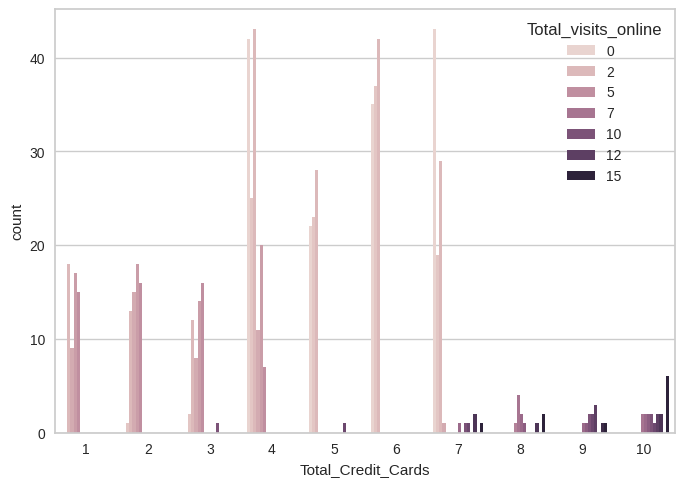

In [ ]:
sns.countplot(data = data, x = "Total_Credit_Cards", hue = "Total_visits_online")

### 'Total_Credit_Cards'  vs 'Total_calls_made'

<Axes: ylabel='Total_Credit_Cards'>

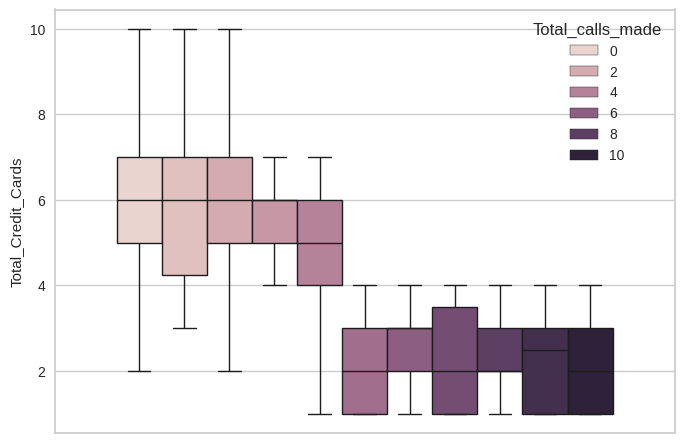

In [ ]:
sns.boxplot(data = data, y = "Total_Credit_Cards", hue = "Total_calls_made")

<Axes: xlabel='Total_Credit_Cards', ylabel='count'>

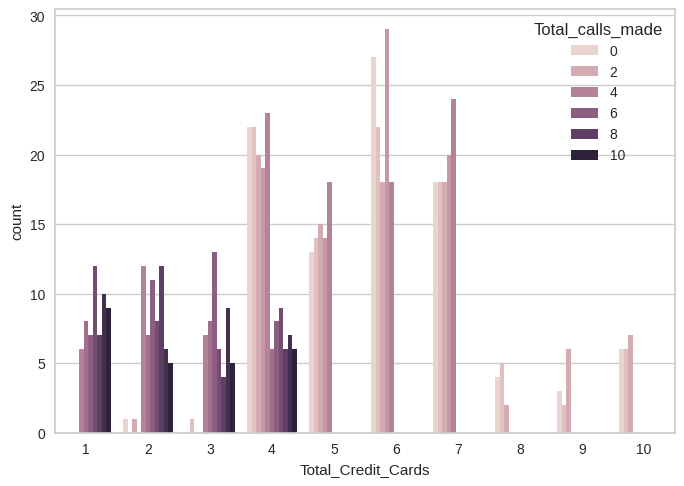

In [ ]:
sns.countplot(data = data, x = "Total_Credit_Cards", hue = "Total_calls_made")

### 'Total_visits_bank' vs 'Total_visits_online'

<Axes: ylabel='Total_visits_bank'>

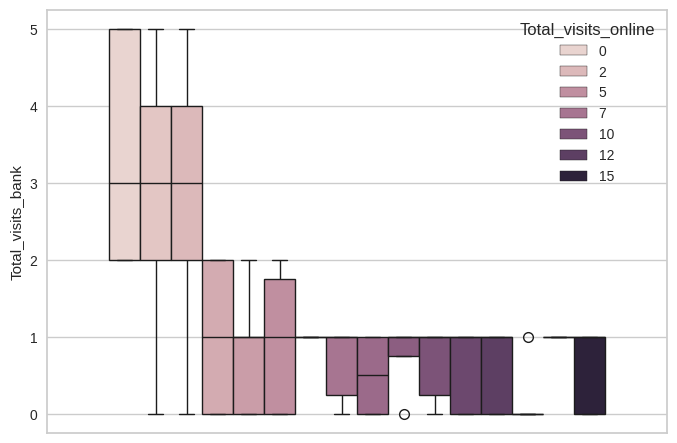

In [ ]:
sns.boxplot(data = data, y = "Total_visits_bank", hue = "Total_visits_online")

<Axes: xlabel='Total_visits_bank', ylabel='count'>

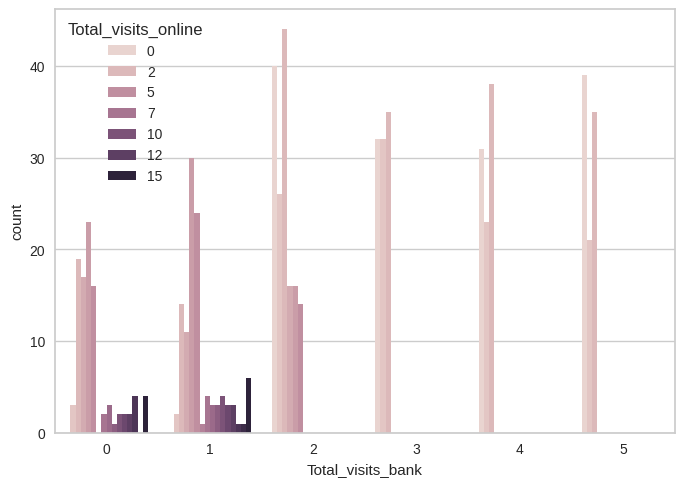

In [ ]:
sns.countplot(data = data, x = "Total_visits_bank", hue = "Total_visits_online")

### 'Total_visits_bank' vs 'Total_calls_made'

<Axes: ylabel='Total_visits_bank'>

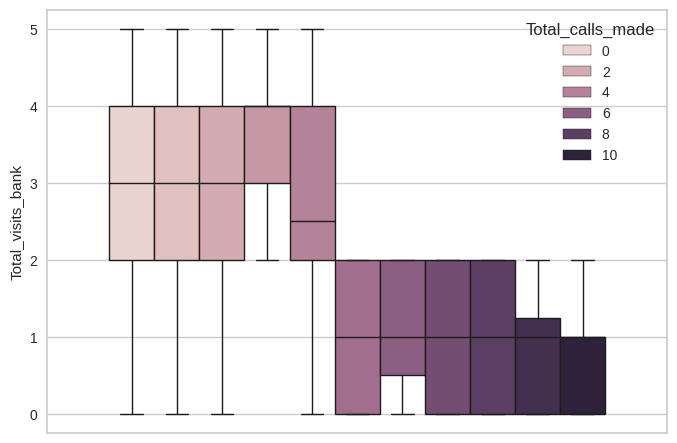

In [ ]:
sns.boxplot(data = data, y = "Total_visits_bank", hue = "Total_calls_made")

<Axes: xlabel='Total_visits_bank', ylabel='count'>

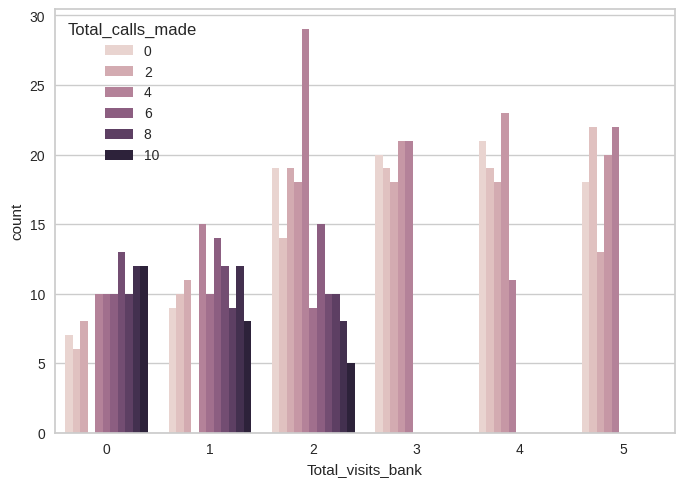

In [ ]:
sns.countplot(data = data, x = "Total_visits_bank", hue = "Total_calls_made")

### 'Total_visits_online' vs 'Total_calls_made'

<Axes: ylabel='Total_visits_online'>

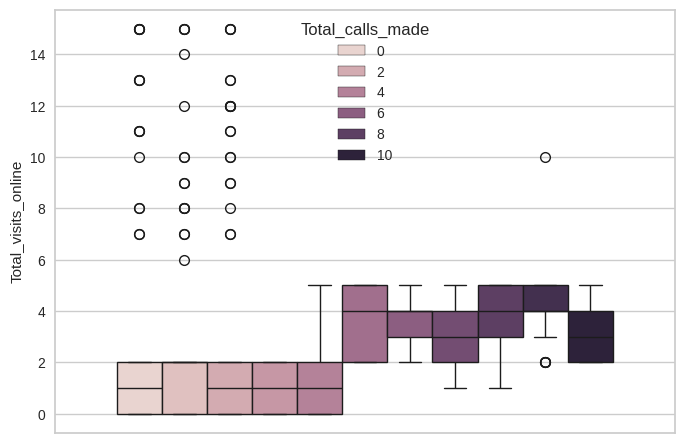

In [ ]:
sns.boxplot(data = data, y = "Total_visits_online", hue = "Total_calls_made")

<Axes: xlabel='Total_visits_online', ylabel='count'>

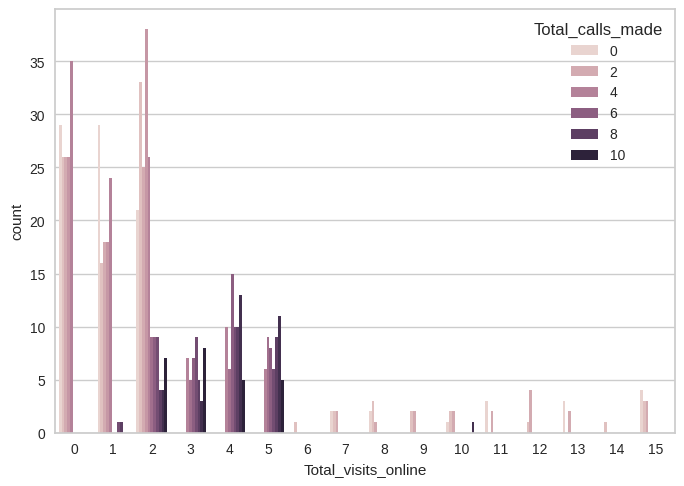

In [ ]:
sns.countplot(data = data, x = "Total_visits_online", hue = "Total_calls_made")

#### Summary of Bivariate Analysis

# Data Preprocessing

- There are no missing values in the dataset

In [ ]:
data.head()

,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,87073,100000,2,1,1,0
1,38414,50000,3,0,10,9
2,17341,50000,7,1,3,4
3,40496,30000,5,1,1,4
5,58634,20000,3,0,1,8


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 650 entries, 0 to 659
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Customer Key         650 non-null    int64
 1   Avg_Credit_Limit     650 non-null    int64
 2   Total_Credit_Cards   650 non-null    int64
 3   Total_visits_bank    650 non-null    int64
 4   Total_visits_online  650 non-null    int64
 5   Total_calls_made     650 non-null    int64
dtypes: int64(6)
memory usage: 35.5 KB


## Scaling

In [6]:
data_scaled = data.copy()
data_scaled.iloc[:, :] = StandardScaler().fit_transform(data_scaled)
data_scaled.head()

,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1.255558,1.766499,-1.241502,-0.862932,-0.547996,-1.258480
1,-0.647723,0.423578,-0.781162,-1.477961,2.531519,1.893108
2,-1.471986,0.423578,1.060199,-0.862932,0.136341,0.142226
3,-0.566286,-0.113590,0.139519,-0.862932,-0.547996,0.142226
5,0.143176,-0.382175,-0.781162,-1.477961,-0.547996,1.542931


# K Means Algorithm

In [17]:
data_scaled.head()

,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1.255558,1.766499,-1.241502,-0.862932,-0.547996,-1.258480
1,-0.647723,0.423578,-0.781162,-1.477961,2.531519,1.893108
2,-1.471986,0.423578,1.060199,-0.862932,0.136341,0.142226
3,-0.566286,-0.113590,0.139519,-0.862932,-0.547996,0.142226
5,0.143176,-0.382175,-0.781162,-1.477961,-0.547996,1.542931


In [18]:
km_df = data_scaled.copy()

In [19]:
km_df.head()

,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1.255558,1.766499,-1.241502,-0.862932,-0.547996,-1.258480
1,-0.647723,0.423578,-0.781162,-1.477961,2.531519,1.893108
2,-1.471986,0.423578,1.060199,-0.862932,0.136341,0.142226
3,-0.566286,-0.113590,0.139519,-0.862932,-0.547996,0.142226
5,0.143176,-0.382175,-0.781162,-1.477961,-0.547996,1.542931


## Checking Elbow Plot

Number of Clusters: 2 	Average Distortion: 1.7831611900856632
Number of Clusters: 3 	Average Distortion: 1.505552435231493
Number of Clusters: 4 	Average Distortion: 1.3623984047994422
Number of Clusters: 5 	Average Distortion: 1.3091985957839447
Number of Clusters: 6 	Average Distortion: 1.2186764739991716
Number of Clusters: 7 	Average Distortion: 1.1805016713111967
Number of Clusters: 8 	Average Distortion: 1.1625982368123389
Number of Clusters: 9 	Average Distortion: 1.1449707352974783
Number of Clusters: 10 	Average Distortion: 1.105362188930244


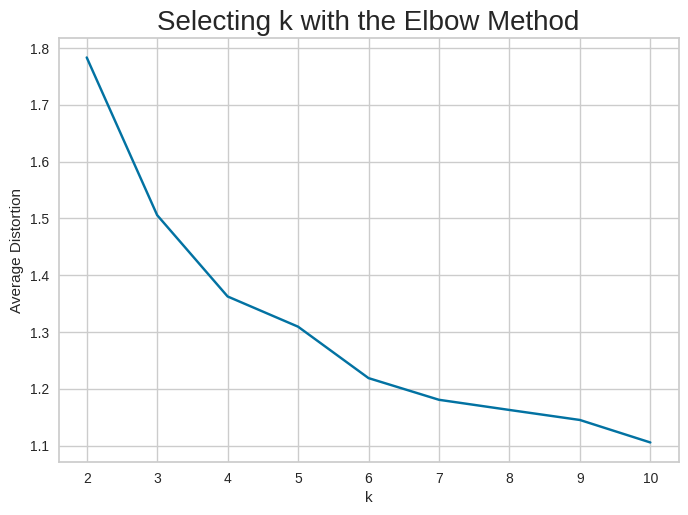

In [7]:
clusters = range(2, 11)
meanDistortions = []

for k in clusters:
    model = KMeans(n_clusters=k, random_state=1)
    model.fit(data_scaled)
    prediction = model.predict(data_scaled)
    distortion = (
        sum(np.min(cdist(data_scaled, model.cluster_centers_, "euclidean"), axis=1))
        / data_scaled.shape[0]
    )

    meanDistortions.append(distortion)

    print("Number of Clusters:", k, "\tAverage Distortion:", distortion)

plt.plot(clusters, meanDistortions, "bx-")
plt.xlabel("k")
plt.ylabel("Average Distortion")
plt.title("Selecting k with the Elbow Method", fontsize=20)
plt.show()

**Let's do further analysis to determine the optimal value of k**

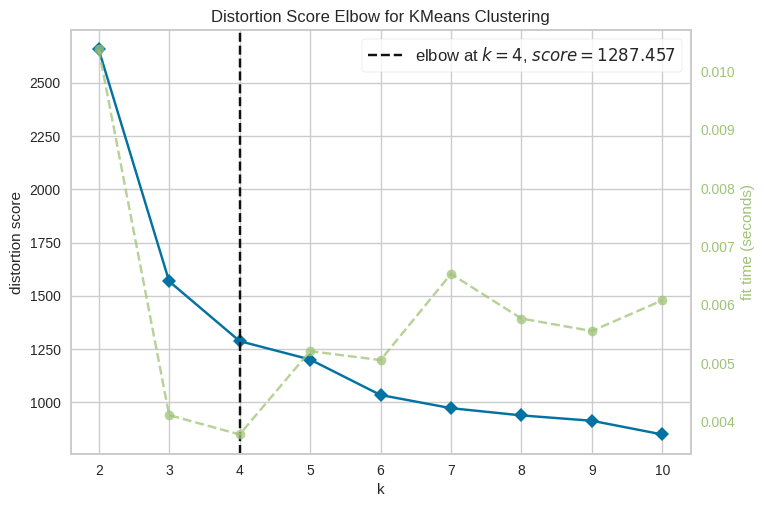

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [8]:
model = KMeans(random_state=1)
visualizer = KElbowVisualizer(model, k=(2, 11), timings=True)
visualizer.fit(data_scaled)  # fit the data to the visualizer
visualizer.show()  # finalize and render figure

## Checking Silhouette Scores

For n_clusters = 2, the silhouette score is 0.3387290202927513)
For n_clusters = 3, the silhouette score is 0.41731503375262197)
For n_clusters = 4, the silhouette score is 0.32351633400914964)
For n_clusters = 5, the silhouette score is 0.277565628705096)
For n_clusters = 6, the silhouette score is 0.2532549890345816)
For n_clusters = 7, the silhouette score is 0.2361158587323242)
For n_clusters = 8, the silhouette score is 0.2220546910172365)
For n_clusters = 9, the silhouette score is 0.19859720613031054)
For n_clusters = 10, the silhouette score is 0.18514574685959645)


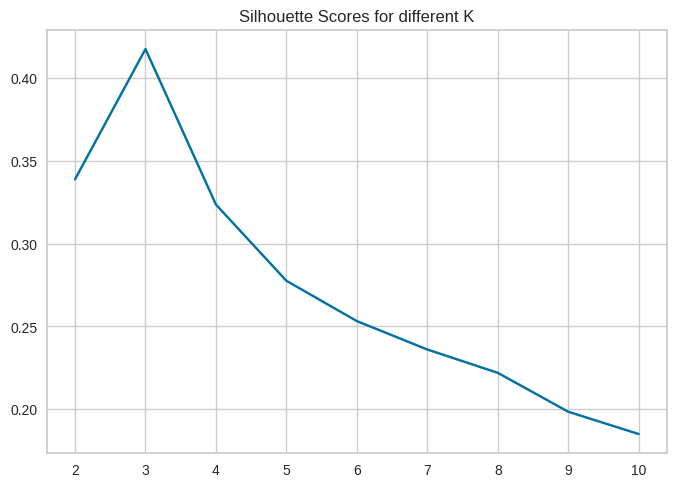

In [9]:
sil_score = []
cluster_list = range(2, 11)
for n_clusters in cluster_list:
    clusterer = KMeans(n_clusters=n_clusters, random_state=1)
    preds = clusterer.fit_predict((data_scaled))
    score = silhouette_score(data_scaled, preds)
    sil_score.append(score)
    print("For n_clusters = {}, the silhouette score is {})".format(n_clusters, score))

plt.plot(cluster_list, sil_score)
plt.title('Silhouette Scores for different K')
plt.show()

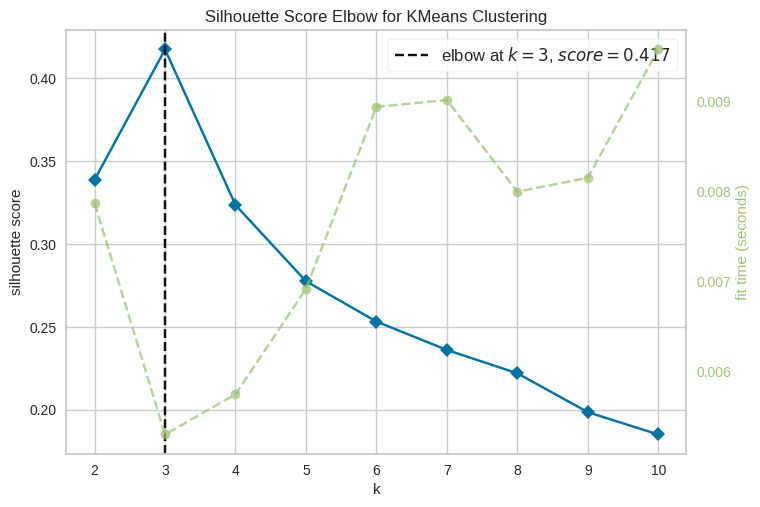

<Axes: title={'center': 'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [10]:
model = KMeans(random_state=1)
visualizer = KElbowVisualizer(model, k=(2, 11), metric="silhouette", timings=True)
visualizer.fit(data_scaled)  # fit the data to the visualizer
visualizer.show()  # finalize and render figure

### Silhouette Plot

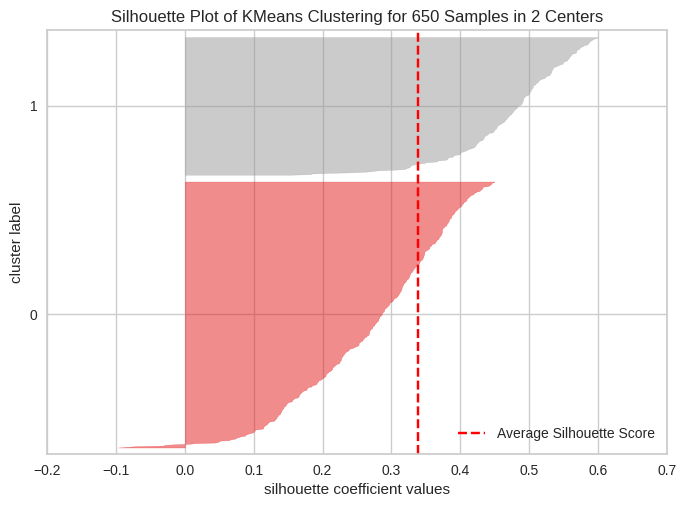

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 650 Samples in 2 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [11]:
# Finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(2, random_state=1))
visualizer.fit(data_scaled)
visualizer.show()

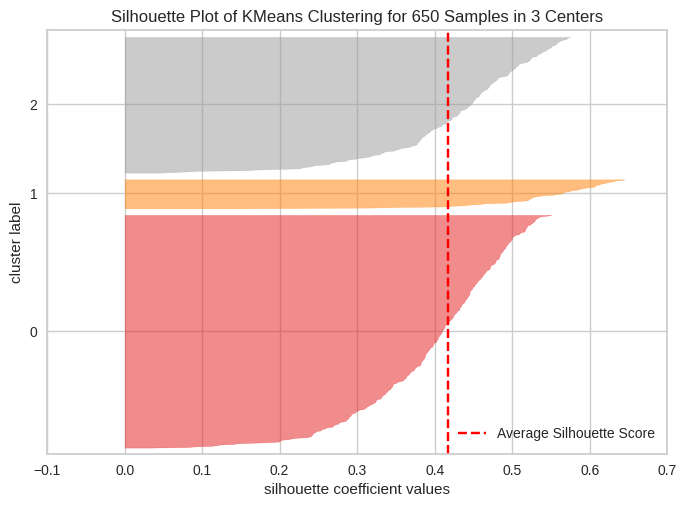

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 650 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [12]:
# Finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(3, random_state=1))
visualizer.fit(data_scaled)
visualizer.show()

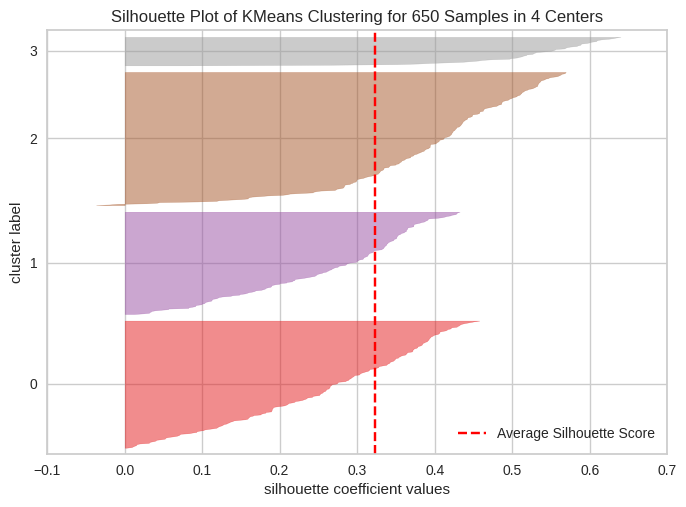

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 650 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [13]:
# Finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(4, random_state=1))
visualizer.fit(data_scaled)
visualizer.show()

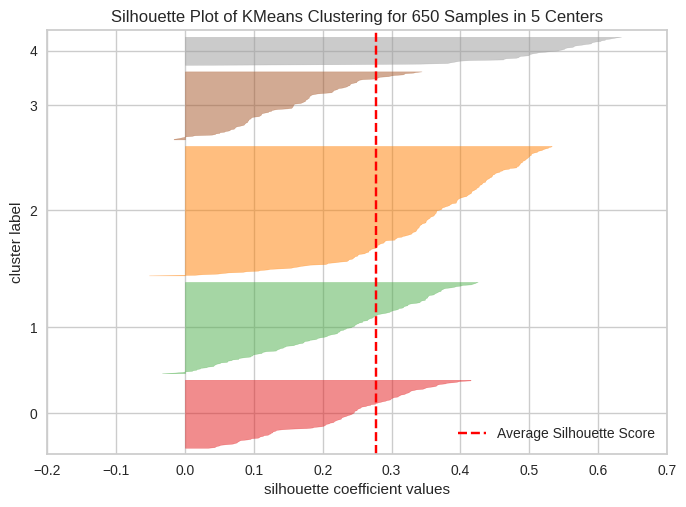

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 650 Samples in 5 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [14]:
# Finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(5, random_state=1))
visualizer.fit(data_scaled)
visualizer.show()

**The Optimal Value of K is 3 based on density of distribution and average silhuoette score**

## Creating Final Model

In [15]:
kmeans = KMeans(n_clusters=4, random_state=1)
kmeans.fit(data_scaled)

KMeans(n_clusters=4, random_state=1)

In [20]:
# adding kmeans cluster labels to the original dataframe
km_df["KM_segments"] = kmeans.labels_

In [21]:
km_df.head(2)

,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,KM_segments
0,1.255558,1.766499,-1.241502,-0.862932,-0.547996,-1.258480,1
1,-0.647723,0.423578,-0.781162,-1.477961,2.531519,1.893108,2


# Hierarchical Clustering

In [22]:
hc_df = data_scaled.copy()

## Computing Cophenetic Correlation

In [23]:
# list of distance metrics
distance_metrics = ["euclidean", "chebyshev", "mahalanobis", "cityblock"]

# list of linkage methods
linkage_methods = ["single", "complete", "average", "weighted"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for dm in distance_metrics:
    for lm in linkage_methods:
        Z = linkage(data_scaled, metric=dm, method=lm)
        c, coph_dists = cophenet(Z, pdist(data_scaled))
        print(
            "Cophenetic correlation for {} distance and {} linkage is {}.".format(
                dm.capitalize(), lm, c
            )
        )
        if high_cophenet_corr < c:
            high_cophenet_corr = c
            high_dm_lm[0] = dm
            high_dm_lm[1] = lm
    print("\n")

Cophenetic correlation for Euclidean distance and single linkage is 0.7165817013740055.
Cophenetic correlation for Euclidean distance and complete linkage is 0.827390591212219.
Cophenetic correlation for Euclidean distance and average linkage is 0.8686027151988046.
Cophenetic correlation for Euclidean distance and weighted linkage is 0.8330643267809358.


Cophenetic correlation for Chebyshev distance and single linkage is 0.7001098309161119.
Cophenetic correlation for Chebyshev distance and complete linkage is 0.7955246474229468.
Cophenetic correlation for Chebyshev distance and average linkage is 0.8634157816426251.
Cophenetic correlation for Chebyshev distance and weighted linkage is 0.8308337479069096.


Cophenetic correlation for Mahalanobis distance and single linkage is 0.6839391035761775.
Cophenetic correlation for Mahalanobis distance and complete linkage is 0.5516124917502649.
Cophenetic correlation for Mahalanobis distance and average linkage is 0.8008982620914478.
Cophenetic

In [24]:
# printing the combination of distance metric and linkage method with the highest cophenetic correlation
print(
    "Highest cophenetic correlation is {}, which is obtained with {} distance and {} linkage.".format(
        high_cophenet_corr, high_dm_lm[0].capitalize(), high_dm_lm[1]
    )
)

Highest cophenetic correlation is 0.8686027151988046, which is obtained with Euclidean distance and average linkage.


## Checking Dendrograms

**We see that the cophenetic correlation is maximum with Euclidean distance and average linkage.**


**Let's view the dendrograms for the different linkage methods.**

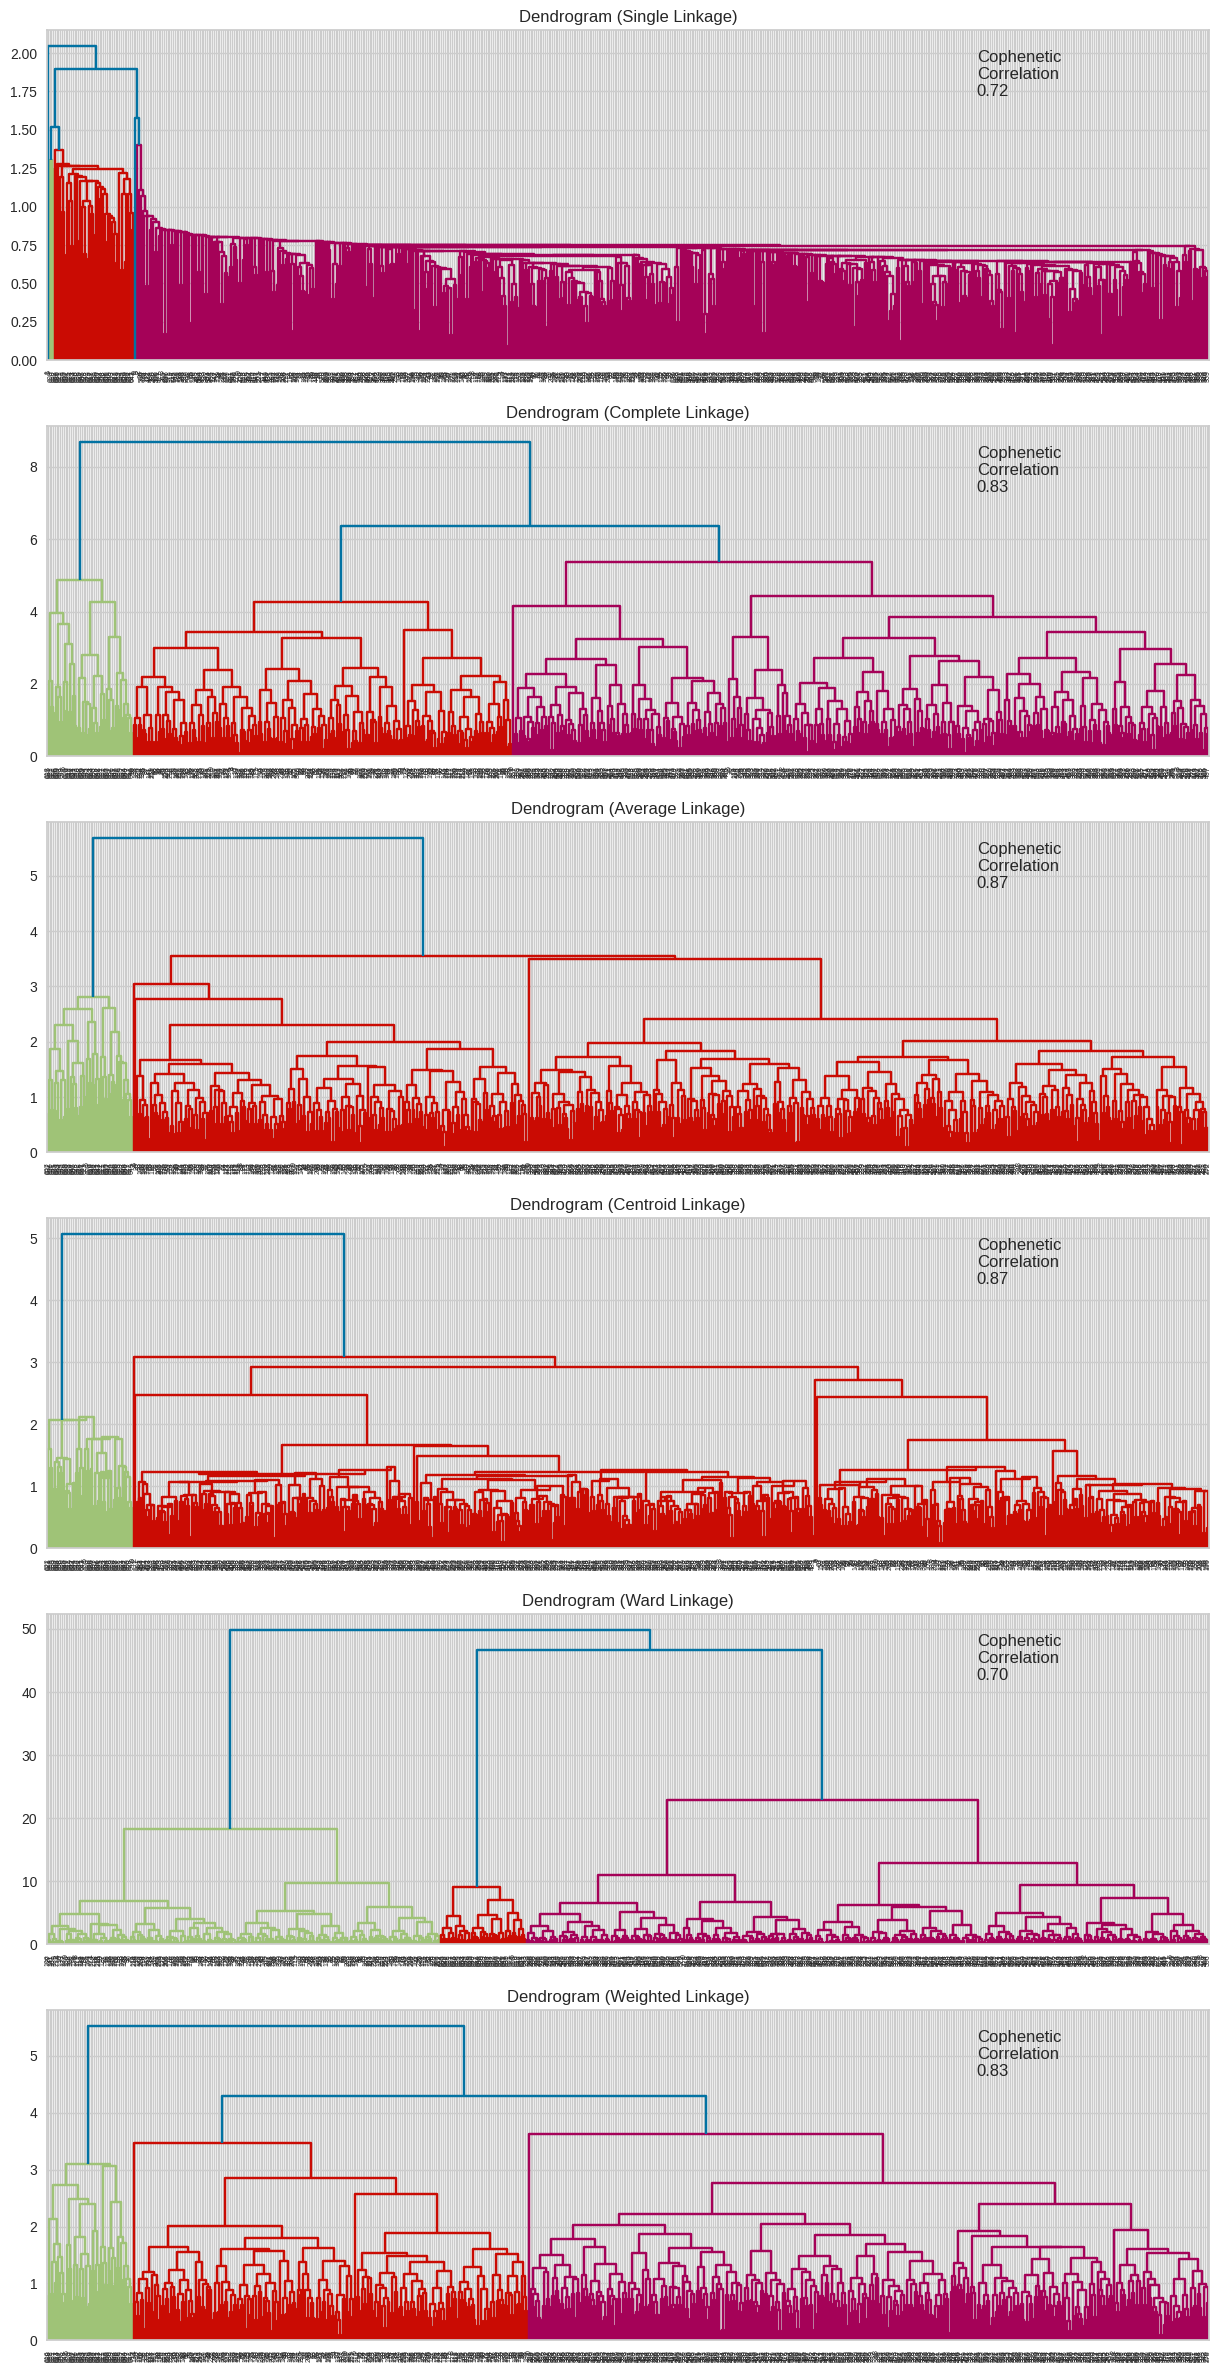

In [25]:
# list of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]

# lists to save results of cophenetic correlation calculation
compare_cols = ["Linkage", "Cophenetic Coefficient"]
compare = []

# to create a subplot image
fig, axs = plt.subplots(len(linkage_methods), 1, figsize=(15, 30))

# We will enumerate through the list of linkage methods above
# For each linkage method, we will plot the dendrogram and calculate the cophenetic correlation
for i, method in enumerate(linkage_methods):
    Z = linkage(data_scaled, metric="euclidean", method=method)

    dendrogram(Z, ax=axs[i])
    axs[i].set_title(f"Dendrogram ({method.capitalize()} Linkage)")

    coph_corr, coph_dist = cophenet(Z, pdist(data_scaled))
    axs[i].annotate(
        f"Cophenetic\nCorrelation\n{coph_corr:0.2f}",
        (0.80, 0.80),
        xycoords="axes fraction",
    )

    compare.append([method, coph_corr])

## Creating Final Model

In [60]:
hc = AgglomerativeClustering(n_clusters=4, metric="euclidean", linkage="ward")
hc_labels = hc.fit_predict(data_scaled)

In [32]:
hc_df["HC_segments"] = hc_labels

# Cluster Profiling and Comparison

## Cluster Profiling: K-means Clustering

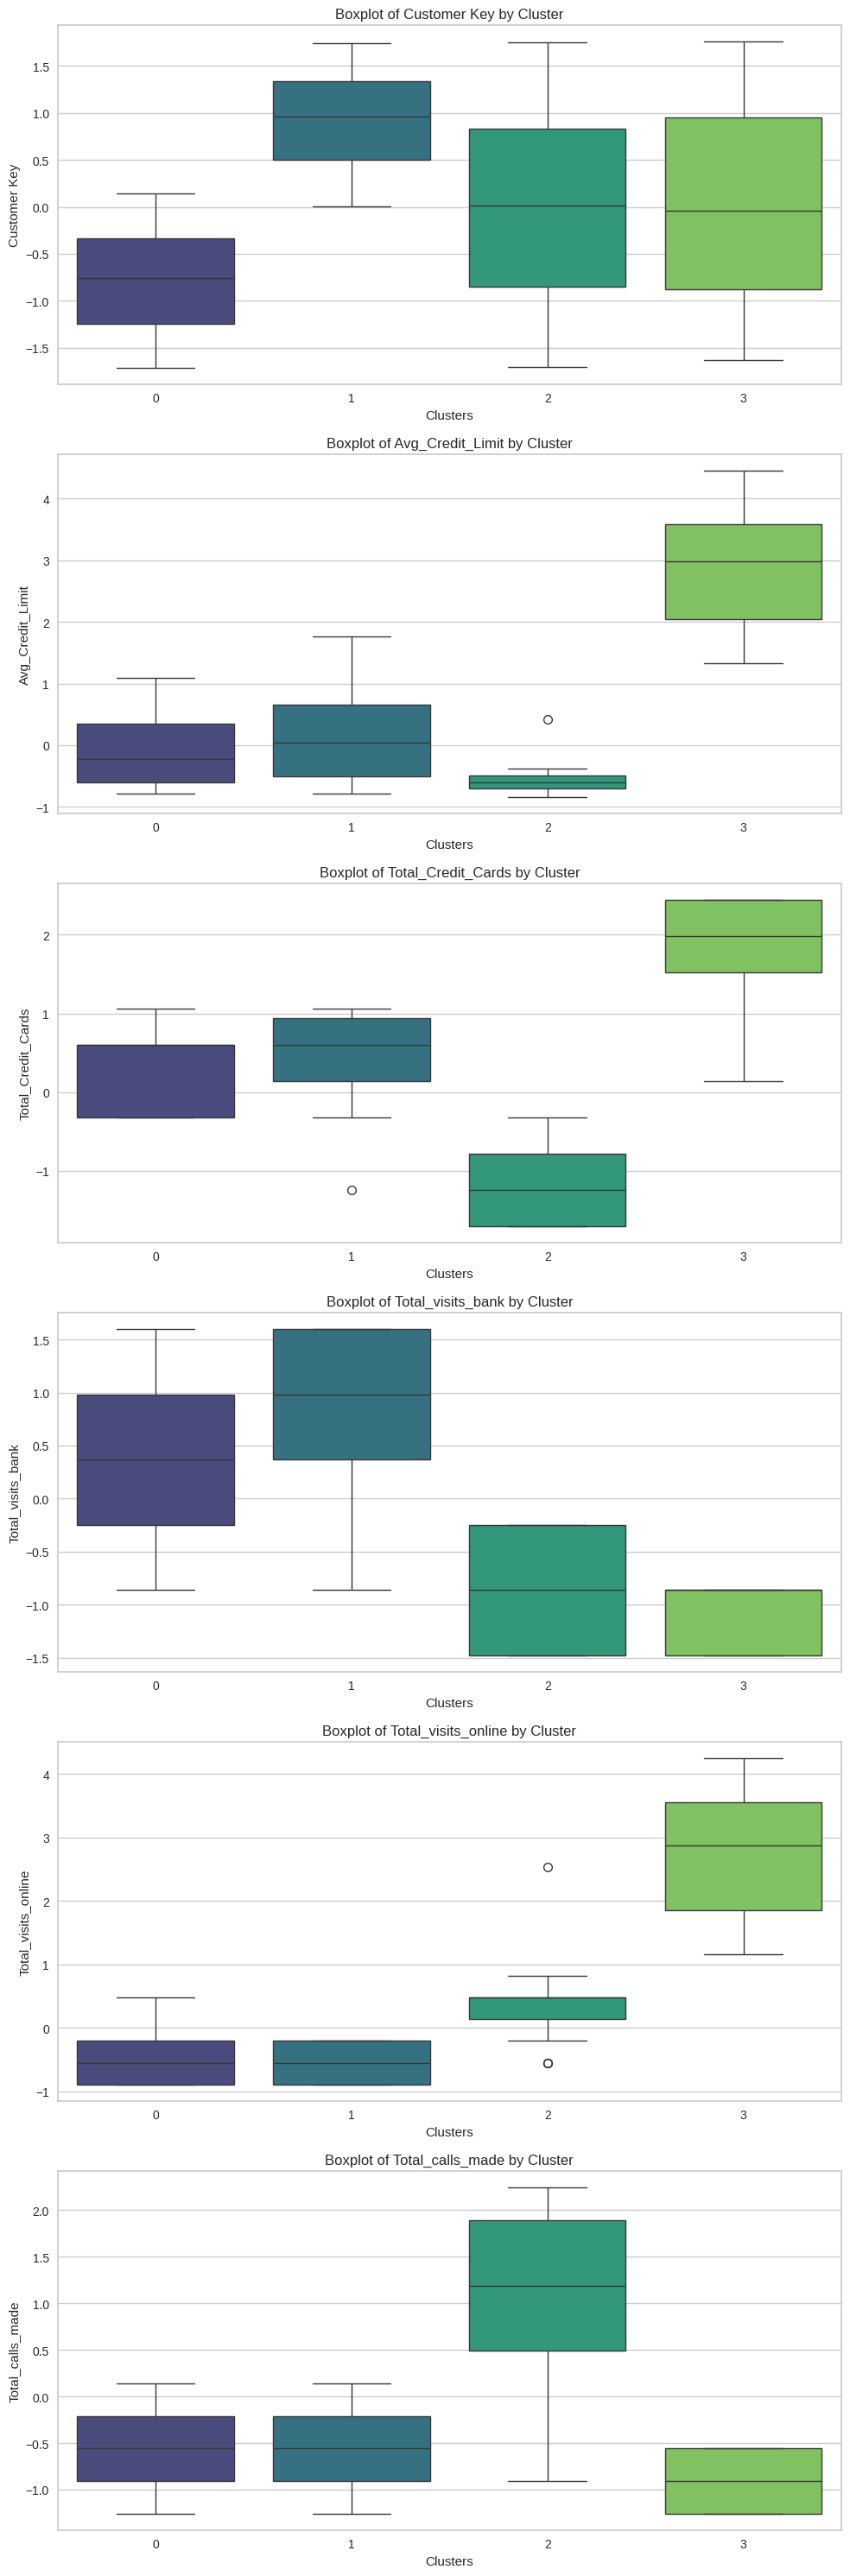

In [52]:
# Get all numerical columns except 'KM_segments'
num_cols = [col for col in km_df.columns if col != "KM_segments"]

# Set figure size based on number of columns
fig, axes = plt.subplots(nrows=len(num_cols), ncols=1, figsize=(10, 5 * len(num_cols)))

# Loop through each column and create a boxplot
for i, col in enumerate(num_cols):
    sns.boxplot(x="KM_segments", y=col, data=km_df, ax=axes[i], palette="viridis")
    axes[i].set_title(f"Boxplot of {col} by Cluster")
    axes[i].set_xlabel("Clusters")
    axes[i].set_ylabel(col)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

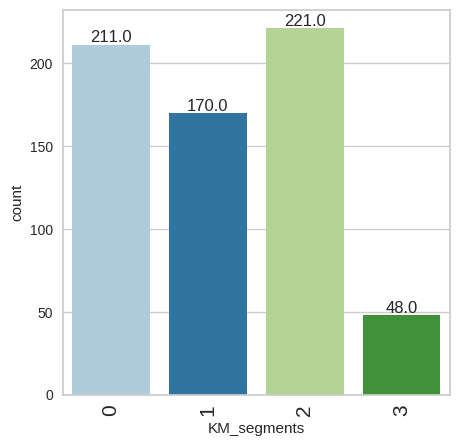

In [47]:
labeled_barplot(feature="KM_segments", data=km_df )


In [55]:
km_df_profiling = km_df.groupby("KM_segments").mean()
# displaying the group-wise means of variables
km_df_profiling.style.highlight_max(color="lightgreen", axis=0)

,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
KM_segments,,,,,,
0,-0.777882,-0.104298,0.340236,0.644033,-0.538266,-0.533233
1,0.936951,0.091166,0.415723,0.689110,-0.568123,-0.576666
2,0.012866,-0.593032,-1.058199,-0.904676,0.329875,1.145220
3,0.041831,2.866016,1.904156,-1.106381,2.859431,-0.886418


### **Insights from K-Means Clustering:**  
#### **Cluster 0 (221 customers)**  
- Moderate total visits to the bank.  
- Slightly above-average total credit cards.  
- Below-average total calls made.  
- Lower avg. credit limit compared to other clusters.  

#### **Cluster 1 (170 customers)**  
- Higher avg. credit limit.  
- More bank visits.  
- Fewer online visits.  
- Slightly more credit cards than average.  

#### **Cluster 2 (221 customers)**  
- Below-average avg. credit limit.  
- More total calls made.  
- Fewer online visits.  
- Fewer total credit cards than other clusters.  

#### **Cluster 3 (48 customers)**  
- The highest avg. credit limit.  
- More credit cards than other clusters.  
- Most online visits.  
- Fewest bank visits.  



## Cluster Profiling: Hierarchical Clustering

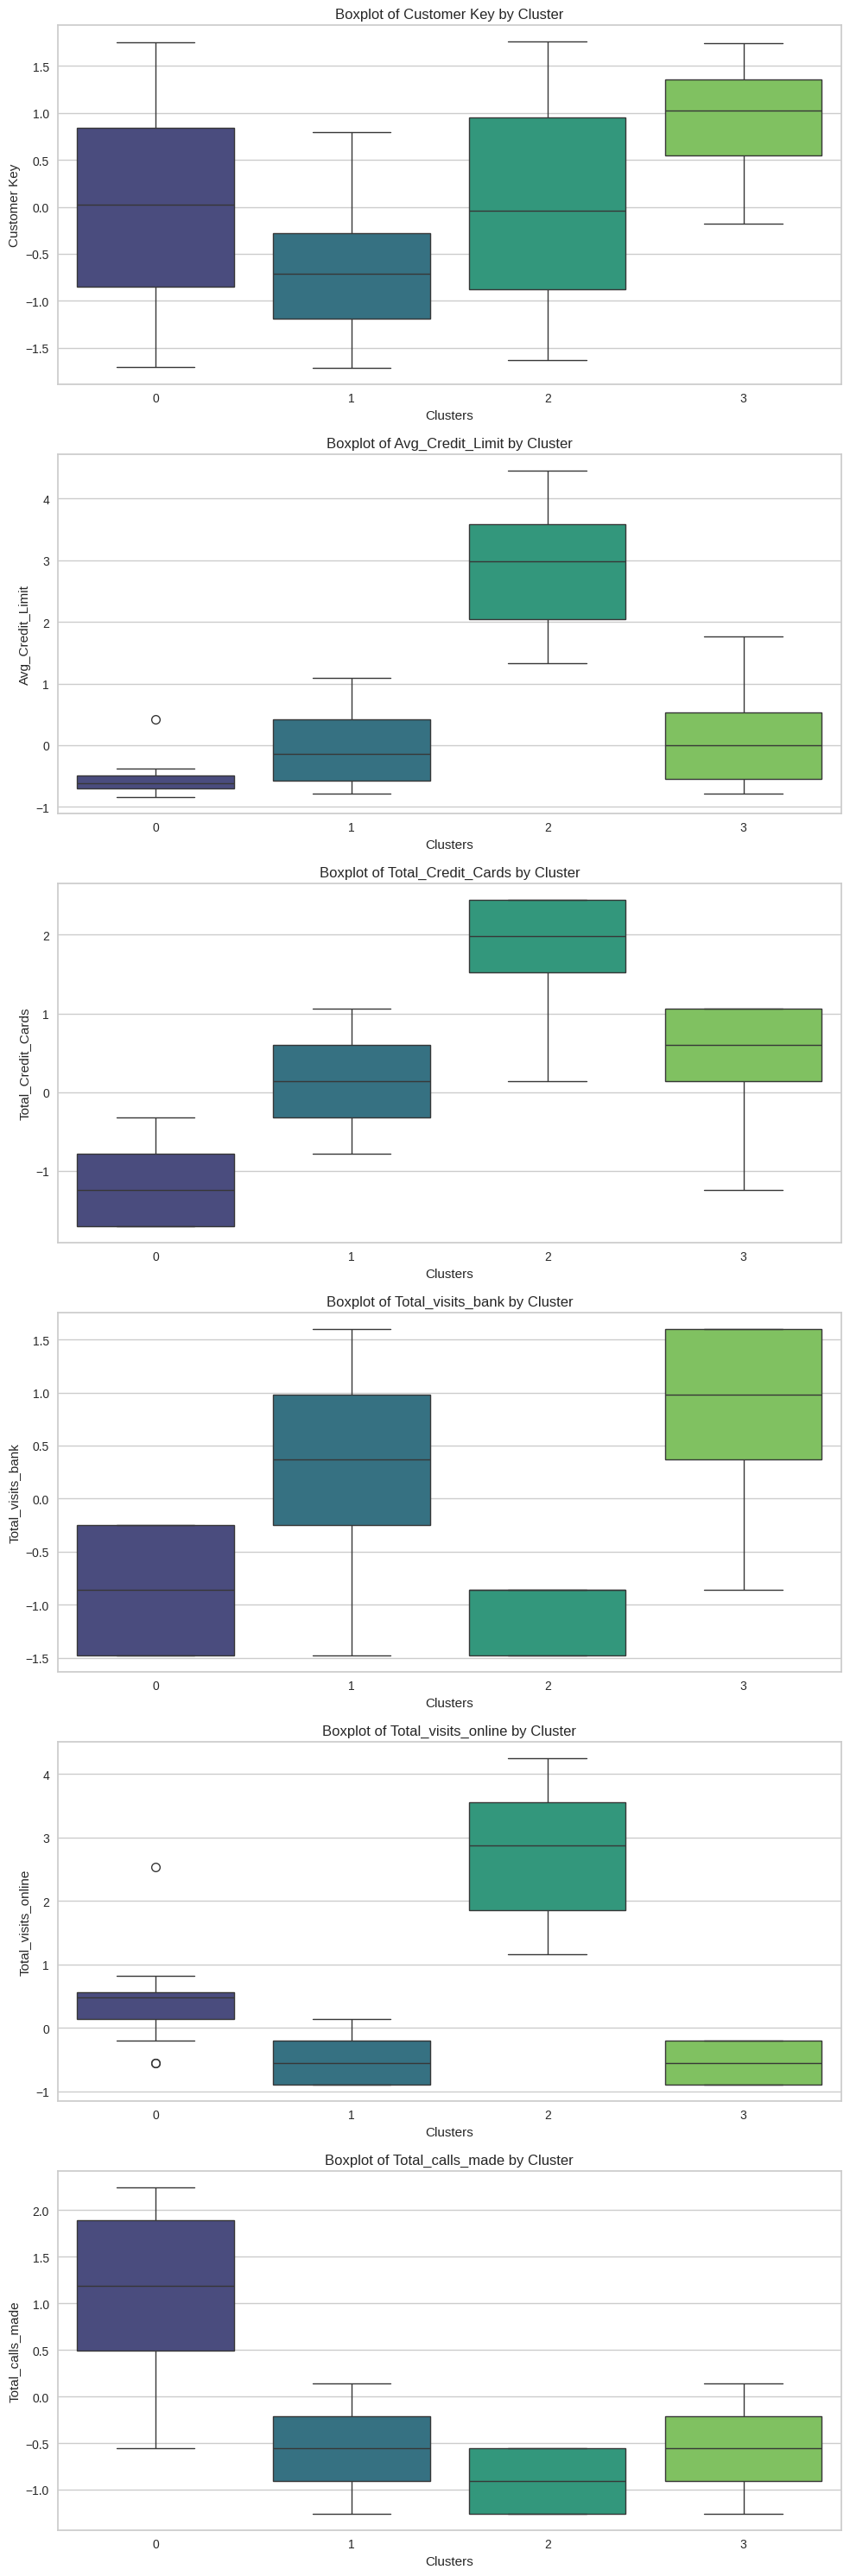

In [58]:
# Get all numerical columns except 'KM_segments'
num_cols = [col for col in hc_df.columns if col != "HC_segments"]

# Set figure size based on number of columns
fig, axes = plt.subplots(nrows=len(num_cols), ncols=1, figsize=(10, 5 * len(num_cols)))

# Loop through each column and create a boxplot
for i, col in enumerate(num_cols):
    sns.boxplot(x="HC_segments", y=col, data=hc_df, ax=axes[i], palette="viridis")
    axes[i].set_title(f"Boxplot of {col} by Cluster")
    axes[i].set_xlabel("Clusters")
    axes[i].set_ylabel(col)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

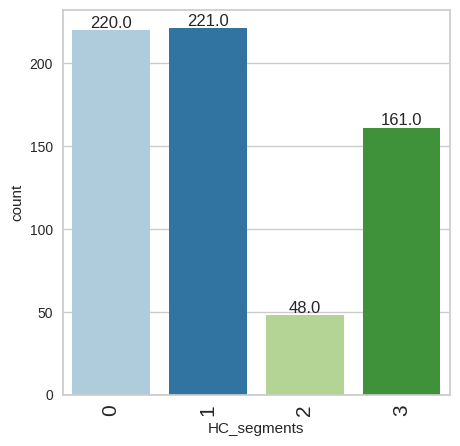

In [59]:
labeled_barplot(feature="HC_segments", data=hc_df )


In [57]:
hc_df_profiling = hc_df.groupby("HC_segments").mean()
# displaying the group-wise means of variables
hc_df_profiling.style.highlight_max(color="lightgreen", axis=0)

,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
HC_segments,,,,,,
0,0.009709,-0.593013,-1.059459,-0.902071,0.335421,1.154554
1,-0.713536,-0.046262,0.318655,0.600891,-0.547996,-0.534360
2,0.041831,2.866016,1.904156,-1.106381,2.859431,-0.886418
3,0.953712,0.019367,0.442600,0.737670,-0.558622,-0.579878


### **Insights from Hierarchical Clustering:**  
#### **Cluster 0 (220 customers)**  
- Fewer credit cards.  
- Fewer bank visits.  
- More online visits.  
- Higher total calls made.  

#### **Cluster 1 (221 customers)**  
- Moderate credit limits.  
- More bank visits.  
- Below-average online visits.  

#### **Cluster 2 (48 customers)**  
- The highest avg. credit limit.  
- More credit cards.  
- Fewer bank visits.  
- Highest online visits.  

#### **Cluster 3 (161 customers)**  
- The highest customer key value.  
- Slightly above-average bank visits.  
- Moderate total calls made.  




## **Key Differences Between K-Means and Hierarchical Clustering for This Dataset:**  

| Feature                | K-Means Clustering | Hierarchical Clustering |
|------------------------|-------------------|-------------------------|
| **Cluster 0 (K-Means: 221, HC: 220)** | Higher bank visits & moderate total credit cards. | Fewer bank visits & more online visits. |
| **Cluster 1 (K-Means: 170, HC: 221)** | More bank visits & fewer online visits. | Similar pattern but more evenly distributed. |
| **Cluster 2 (K-Means: 221, HC: 48)** | Lower avg. credit limit & more calls. | Smallest group, highest avg. credit limit & most online visits. |
| **Cluster 3 (K-Means: 48, HC: 161)** | Highest avg. credit limit & fewest bank visits. | Much larger group with varied characteristics. |

### **Key Observations on the Differences:**  
- K-Means produced a more balanced distribution of clusters (closer sizes).  
- Cluster 2 in K-Means is large but is split in Hierarchical, showing different customer behaviors.  
- The Hierarchical approach captures the highest avg. credit limit cluster differently than K-Means.  


**Since both clustering methods resulted in the same cluster distribution, it suggests that the customer segments are well-defined regardless of the clustering approach.**